# COVID-19 Analysis

## Importing libraries and dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source : https://ourworldindata.org/coronavirus-source-data

In [43]:
df = pd.read_csv('COVID_Total.csv')
df.columns

Index(['date', 'World', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican',
       'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=211)

In [0]:
df = df[['date', 'World', 'India']]
df = df.loc[df['India']!=0]

In [45]:
df = df.set_index([pd.Index(list(i for i in range(0,99)))])
df['index1'] = df.index
cols = list(df.columns)
dataset = df[[cols[-1]] + cols[:-1]]
dataset

,index1,date,World,India
0,0,30-01-2020,7823,1
1,1,31-01-2020,9826,1
2,2,01-02-2020,11946,1
3,3,02-02-2020,14554,2
4,4,03-02-2020,17372,2
...,...,...,...,...
94,94,03-05-2020,3389459,39980
95,95,04-05-2020,3468047,42533
96,96,05-05-2020,3545486,46433
97,97,06-05-2020,3624789,49391


In [0]:
X = dataset.iloc[:, 0:1]
y = dataset.iloc[:, -1]

## Creating prediction for next 7 days

### Training with all data

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pf = PolynomialFeatures(degree = 4)
X_poly = pf.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Creating test cases for next 7 days

In [0]:
X_new = np.linspace(99, 105, num = 7, dtype = np.int32, endpoint = True)
X_new = X_new.reshape(len(X_new), 1)

### Calculating and displaying Results

NOTE : The data is from 1st Jan 2020 to 7th May 2020.
With 1st Jan 2020 being 'Day 0'.
An additional dataset is created of next 7 days (ie 8th May 2020 to 14 May 2020) ranging from Day 99 to Day 105.
A bar graph is also plotted for the predicted values.


In [0]:
X_new = np.linspace(99, 105, num = 7, dtype = np.int32, endpoint = True)
X_new = X_new.reshape(len(X_new), 1)
X_total = np.concatenate((X, X_new))

In [50]:
y_new_pred = regressor.predict(pf.transform(X_new))
y_new_pred

array([54844.72029669, 58011.72520449, 61310.20326011, 64743.65577115,
       68315.62907744, 72029.71455098, 75889.548596  ])

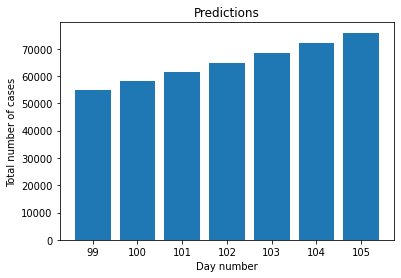

In [51]:
X_plot = list(i for i in range(99,106))
y_pos = np.arange(len(X_plot))

plt.bar(y_pos, y_new_pred) 
plt.xticks(y_pos, X_plot)
plt.title('Predictions')
plt.xlabel('Day number')
plt.ylabel('Total number of cases')

plt.show()

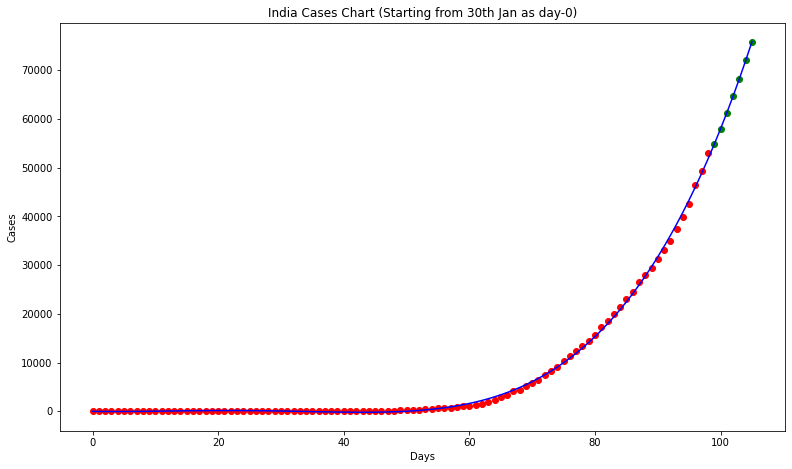

In [52]:
plt.figure(figsize=(13, 7.5))
plt.scatter(X, y, color = 'red')
plt.scatter(X_new, y_new_pred, color = 'green')
plt.plot(X_total, regressor.predict(pf.transform(X_total)), color = 'blue')
plt.title("India Cases Chart (Starting from 30th Jan as day-0)")
plt.xlabel('Days')
plt.ylabel('Cases')
plt.show()